In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid Data.csv to Covid Data (3).csv


In [ ]:
import io
covid = pd.read_csv(io.BytesIO(uploaded['Covid Data.csv']))

In [ ]:
covid.head(8)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
covid.isna().sum().sum() #to check NaN values

0

In [ ]:
covid.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [ ]:
covid.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [ ]:
#Removing missing values except "INTUBED", "PREGNANT", "ICU"
covid = covid[(covid.PNEUMONIA == 1) | (covid.PNEUMONIA == 2)]
covid = covid[(covid.DIABETES == 1) | (covid.DIABETES == 2)]
covid = covid[(covid.COPD == 1) | (covid.COPD == 2)]
covid = covid[(covid.ASTHMA == 1) | (covid.ASTHMA == 2)]
covid = covid[(covid.INMSUPR == 1) | (covid.INMSUPR == 2)]
covid = covid[(covid.HIPERTENSION == 1) | (covid.HIPERTENSION == 2)]
covid = covid[(covid.OTHER_DISEASE == 1) | (covid.OTHER_DISEASE == 2)]
covid = covid[(covid.CARDIOVASCULAR == 1) | (covid.CARDIOVASCULAR == 2)]
covid = covid[(covid.OBESITY == 1) | (covid.OBESITY == 2)]
covid = covid[(covid.RENAL_CHRONIC == 1) | (covid.RENAL_CHRONIC == 2)]
covid = covid[(covid.TOBACCO == 1) | (covid.TOBACCO == 2)]

In [ ]:
covid["DEATH"] = [2 if each=="9999-99-99" else 1 for each in covid.DATE_DIED]

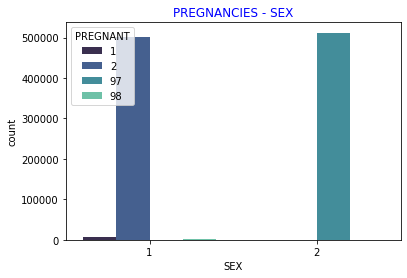

In [ ]:
plt.figure()
ax = sns.countplot(covid.SEX, hue = covid.PREGNANT, palette = "mako")
plt.title("PREGNANCIES - SEX",color="blue");
plt.show()

In [ ]:
# Converting process according to inference above
covid.PREGNANT = covid.PREGNANT.replace(97,2)

# Getting rid of the missing values
covid = covid[(covid.PREGNANT == 1) | (covid.PREGNANT == 2)]

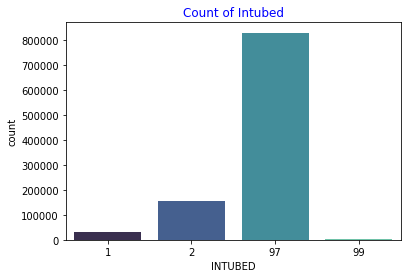

In [ ]:
ax = sns.countplot(covid.INTUBED, palette = "mako")
plt.title("Count of Intubed",color="blue");

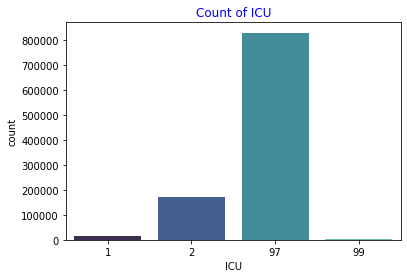

In [ ]:
ax = sns.countplot(covid.ICU, palette = "mako")
plt.title("Count of ICU",color="blue");

In [ ]:
covid.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

## **Data Visualization**




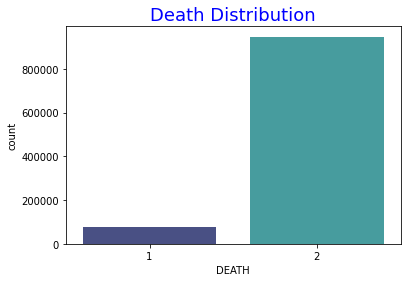

In [ ]:
ax = sns.countplot(covid.DEATH, palette="mako")
plt.title("Death Distribution", fontsize=18,color="blue");

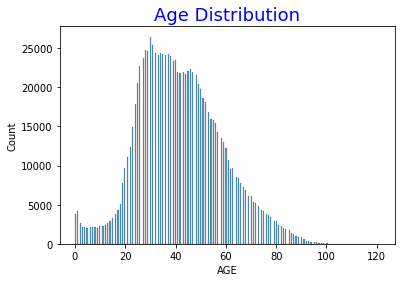

In [ ]:
sns.histplot(x=covid.AGE, palette="mako")
plt.title("Age Distribution", color="blue", fontsize=18);

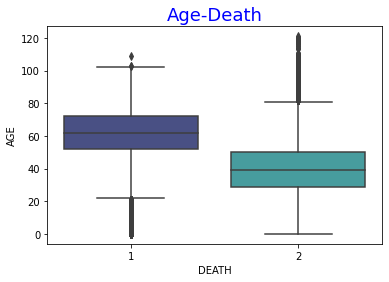

In [ ]:
sns.boxplot(x="DEATH", y="AGE",data=covid,palette="mako")
plt.title("Age-Death",fontsize=18, color="blue");

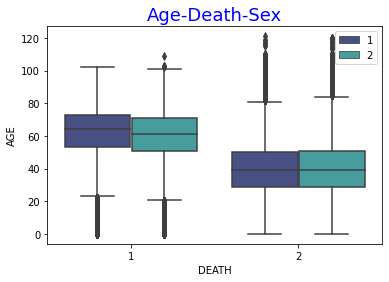

In [ ]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=covid,palette="mako")
plt.title("Age-Death-Sex",fontsize=18, color="blue")
plt.legend(loc="best");

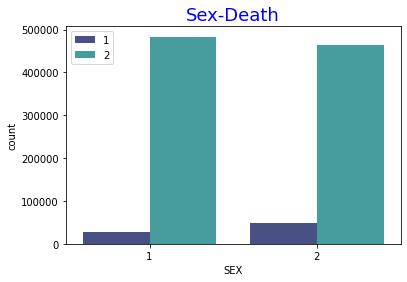

In [ ]:
sns.countplot(covid.SEX,hue=covid.DEATH, palette="mako")
plt.title("Sex-Death",fontsize=18, color="blue")
plt.legend(loc="best");

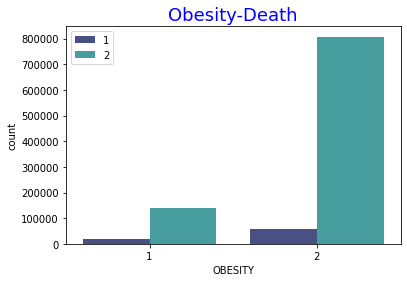

In [ ]:
ax=sns.countplot(covid.OBESITY,hue=covid.DEATH, palette="mako")
plt.title("Obesity-Death",fontsize=18, color="blue")
plt.legend(loc="best");

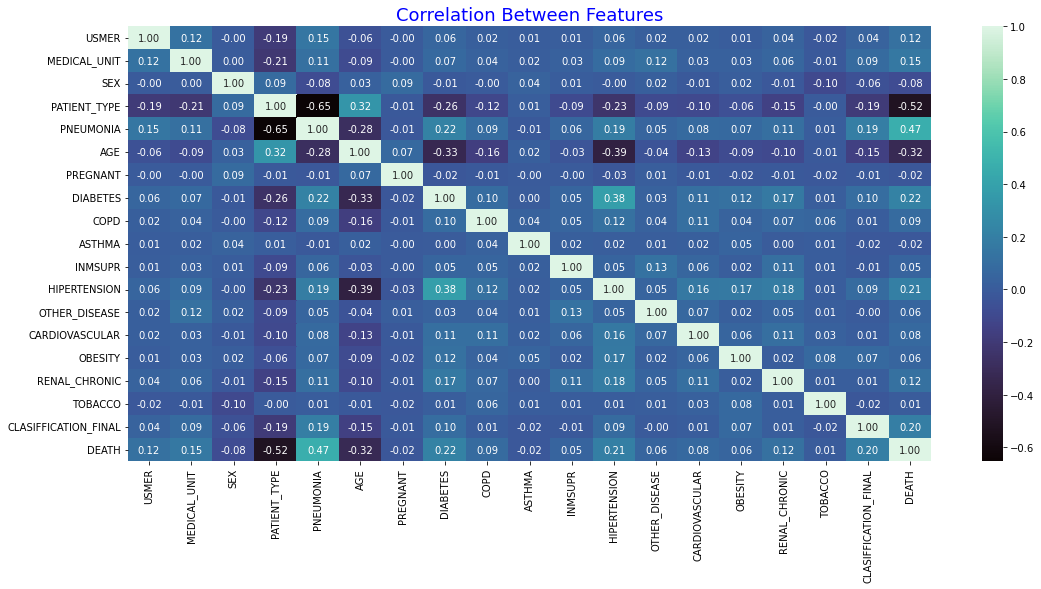

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(covid.corr(),annot=True, fmt=".2f", cmap="mako")
plt.title("Correlation Between Features",fontsize=18,color="blue");

In [ ]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

covid.drop(columns=unrelevant_columns,inplace=True)

### Non binary categories

In [ ]:
covid = pd.get_dummies(covid,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
covid.AGE = scaler.fit_transform(covid.AGE.values.reshape(-1,1))

### Determining the "x" and "y"



In [ ]:
x = covid.drop(columns="DEATH")
y = covid["DEATH"]

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9393285582888119


In [ ]:
from sklearn.metrics import f1_score
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.51909877 0.96762183]


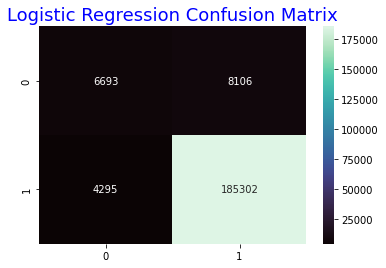

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f", cmap="mako")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="blue");

### Inference:

In [ ]:
#With Logistic Regression, we achieved good accuracy.
#However, it is prone to error, thus we must double-check the other metrics.
#The F1 Score indicates that we anticipated the patients who survived well, but we are unable to make the same claim for the patients who passed away.
#When we look at the confusion matrix, we also observe the same thing. As I indicated, this issue is predicated on the imbalance dataset.

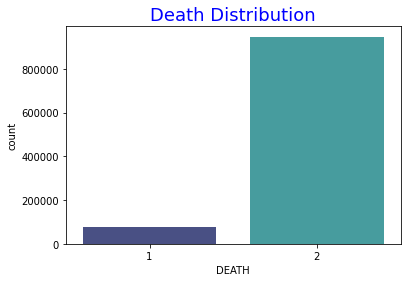

In [ ]:
ax = sns.countplot(covid.DEATH, palette="mako")
plt.title("Death Distribution", fontsize=18,color="blue");

## **Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

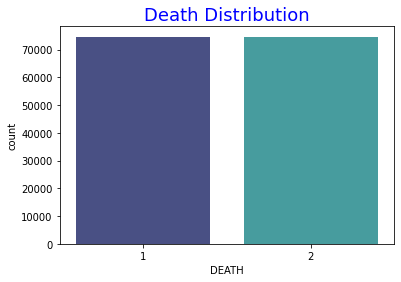

In [ ]:
ax = sns.countplot(y_resampled, palette="mako")
plt.title("Death Distribution", fontsize=18,color="blue");

## **Train Test Split After Undersampling**

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


## **Logistic Regression After Undersampling**

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9051669289756555


In [ ]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.90616302 0.90414946]


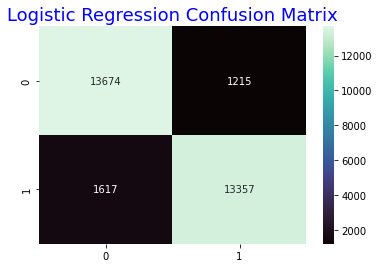

In [ ]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f", cmap="mako")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="blue");

## **Logistic Regression Curve**

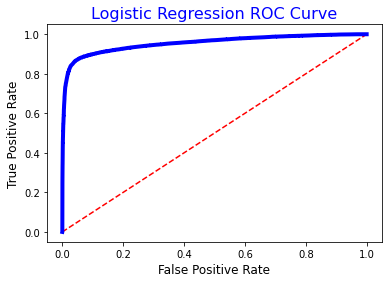

In [ ]:
from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--", color='red')
plt.plot(fpr, tpr, label = "Logistic Regression", lw='4', color='blue')
plt.xlabel("False Positive Rate", fontdict={'fontsize': 12, 'color' : 'black'})
plt.ylabel("True Positive Rate", fontdict={'fontsize': 12, 'color' : 'black'})
plt.title("Logistic Regression ROC Curve", fontdict={'fontsize': 16, 'color' : 'blue'})
plt.show()